# HW5

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
N = [5,10,20,30,40]

In [2]:
def exact(a,b):
    return math.atan(b) - math.atan(a)    

In [3]:
def chebyshev_integrand(fx, N):
    # define the function considering with chebyshev weight function
    gx = lambda x: fx(x)*(math.sqrt(1-x**2))
    # Summation over chebyshev points
    app_I  = 0
    for i in range(1,N+1):
        app_I = app_I + gx(math.cos((i)*(math.pi/(N))))
    # Multiply with w_i
    app_I = (math.pi/N) * app_I 
    return app_I

def visualize_actual_function(fx, x,y,a,b, func_def):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', linewidth=2)
    ax.set_ylim(bottom=0)
    ax.set_title("f(x) = "+func_def+" function where a ="+str(a)+", b="+str(b))
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")


    # Make the shaded region
    ix = np.linspace(a, b)
    iy = fx(ix)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    fig.text(0.9, 0.05, '$x$')
    fig.text(0.1, 0.9, '$y$')

    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([a, b], labels=['$a$', '$b$'])
    ax.set_yticks([])

    plt.show()
    
def plot_app_and_exact(fx, I,a,b, method):
    res = []
    if method == "Cheby":
        for n in N:
            res.append(chebyshev_integrand(fx, n))
    else:
        for n in N:
            res.append(trapezoidal(fx, a,b, n))
    plt.plot(N,res, label="G-C approximation")
    plt.xlabel("N values")
    plt.ylabel("Approximated Integral Values")
    plt.title("Gauss-Chebyshev for ∫("+str(a)+" to "+str(b)+") f(x) dx")
    plt.axhline(I,color = 'g', label = 'Exact Solution')
    plt.legend()
    return res
    
def plot_err(res, I, method_name):
    err = []
    for i in range(len(N)):
        err.append(abs(res[i] - I)/I)

    plt.plot(N,err, label="Relative Error of "+method_name)
    plt.xlabel("N values")
    plt.ylabel("Relative Error")
    plt.title("Relative Error of "+method_name)
    

## Q1

### a) 

In [4]:
fx = lambda x: 1/(1+x**2)
x = np.linspace(-4,3,1000)
y = fx(x)

In [5]:
a = -1
b = 1
I = exact(a,b)

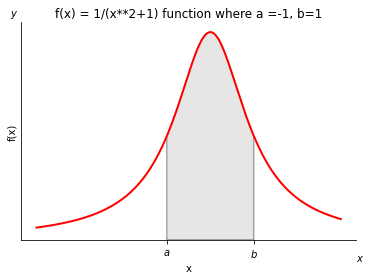

In [6]:
visualize_actual_function(fx, x,y,a,b, "1/(x**2+1)")

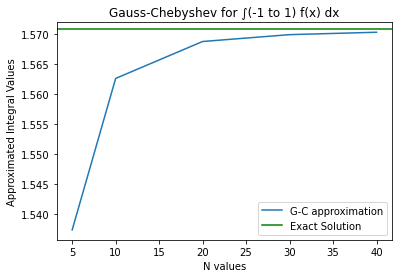

In [7]:
res_gc = plot_app_and_exact(fx,I,a,b, "Cheby")

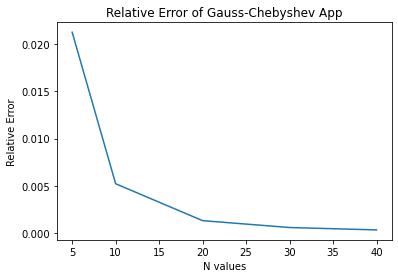

In [8]:
plot_err(res_gc, I, "Gauss-Chebyshev App")

### b)

In [9]:
a = -3
b = 2
I = exact(a,b)

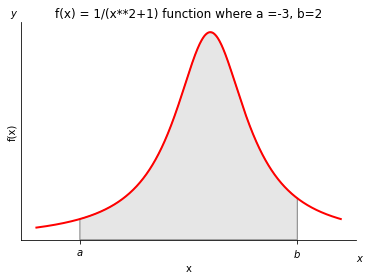

In [10]:
visualize_actual_function(fx,x,y,a,b, "1/(x**2+1)")

In [11]:
fx_affine = lambda a,b,t: ((b-a)/2)*fx(((b-a)*t+(a+b))/2)
fx_new = lambda x: fx_affine(a,b,x)

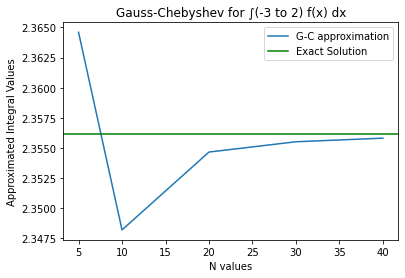

In [12]:
res_aff = plot_app_and_exact(fx_new,I,a,b, "Cheby")

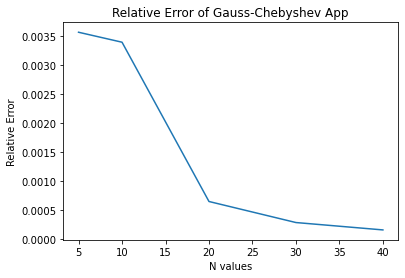

In [13]:
plot_err(res_aff, I, "Gauss-Chebyshev App")

## Q2

In [14]:
a = -1
b = 1
I = exact(a,b)

In [15]:
def trapezoidal(f, a, b, n):
    h = float(b-a)/n
    result = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

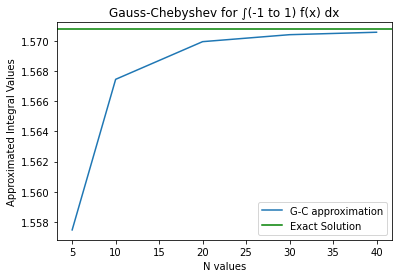

In [16]:
res_ct = plot_app_and_exact(fx_new,I,a,b, "Trap")

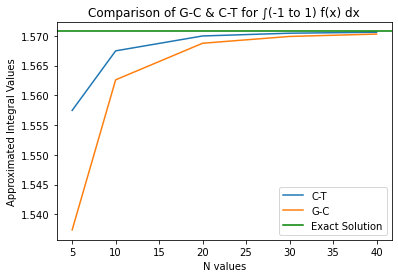

In [17]:
plt.plot(N,res_ct, label="C-T")
plt.plot(N,res_gc, label="G-C")
plt.xlabel("N values")
plt.ylabel("Approximated Integral Values")
plt.title("Comparison of G-C & C-T for ∫(-1 to 1) f(x) dx")
plt.axhline(I,color = 'g', label = 'Exact Solution')
plt.legend()

# Q3

/tmp/ipykernel_8903/1547267482.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x**5 + 1) * np.exp(-0.03 * x**2 * np.sqrt(x))


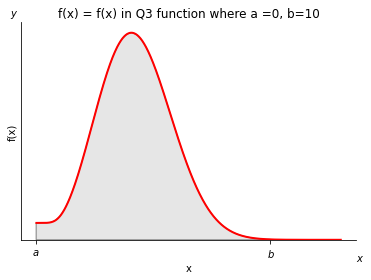

In [18]:
a = 0
b = 10
def integrand(x):
    return np.sqrt(x**5 + 1) * np.exp(-0.03 * x**2 * np.sqrt(x))
x = np.linspace(-3,13,1000)
y = integrand(x)
visualize_actual_function(integrand, x,y,a,b, "f(x) in Q3")

### Computation

In [19]:
from scipy import integrate
integrate.quad(integrand, 0, 10)

(49.116597500550235, 1.1626031755891469e-10)

In [20]:
integrate.quad(integrand, 0, 10)

(49.116597500550235, 1.1626031755891469e-10)

In [21]:
integrate.quadrature(integrand, 0.0, 10.0)

(49.11659968738927, 2.821628015681199e-07)

In [22]:
I = 49.11659968738927

In [23]:
def chebyshev_nodes(a, b, n):
    k = np.arange(1, n + 1)
    # x = np.cos(k* np.pi / (n))
    x = np.cos((2*k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x

def composite_simpson_chebyshev(f, a, b, n):
    x = chebyshev_nodes(a, b, n)
    h = (b - a) / n

    integral = f(a) + f(b)
    for i in range(1, n):
        if i % 2 == 0:
            integral += 2 * f(x[i])
        else:
            integral += 4 * f(x[i])
    
    integral *= h / 3
    return integral


In [24]:
n = 10  # Number of subintervals
composite_simpson_chebyshev(integrand, a, b, n)

35.54512771724072

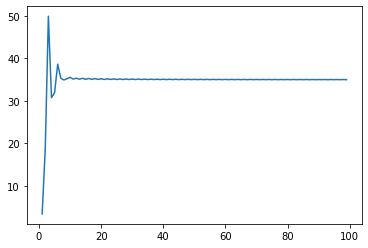

In [25]:
res =  []
x = []
for n in range(1,100):    
    result = composite_simpson_chebyshev(integrand, a, b, n)
    res.append(result)
    x.append(n)

# plt.xticks(x)
plt.plot(x,res)
# plt.axhline(I,color = 'g', label = 'Exact Solution')


In [26]:
import numpy as np

def chebyshev_nodes(a, b, n):
    k = np.arange(1, n + 1)
    x = np.cos((k) * np.pi / (n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x

def composite_simpson_chebyshev(f, a, b, n):
    x = chebyshev_nodes(a, b, n)
    h = (b - a) / n

    integral = f(a) + f(b)
    for i in range(1, n):
        if i % 2 == 0:
            integral += 2 * f(x[i])
        else:
            integral += 4 * f(x[i])
    
    integral *= h / 3
    return integral

def integrand_example(x):
    return np.sin(x)

a = 0  # Lower limit of integration
b = np.pi / 2  # Upper limit of integration
n = 10000  # Number of subintervals

result = composite_simpson_chebyshev(integrand_example, a, b, n)
print("Approximate integral:", result)


Approximate integral: 0.9457681451148772


In [27]:
I = -math.cos(np.pi/2)+math.cos(0)

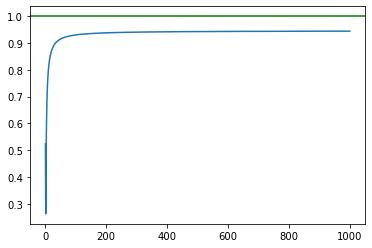

In [28]:
res =  []
x = []
for n in range(1,1000):    
    result = composite_simpson_chebyshev(integrand_example, a, b, n)
    res.append(result)
    x.append(n)

plt.plot(x,res)
plt.axhline(I,color = 'g', label = 'Exact Solution')
